# <span style="color:#88228F"> In-vivo QSM image creation </span> </br>

In [65]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import pandas as pd

In [2]:
# Import from monkey_tools
import os, sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)
print(parent_dir)

import monkey_tools.extract_metric
importlib.reload(monkey_tools.extract_metric)

from monkey_tools.extract_metric import extract_values_per_vertebrae  # re-import updated function

c:\Users\Admin\Documents\msc_project\Image-processing-strategies


In [3]:
import monkey_tools.snr_calc
importlib.reload(monkey_tools.snr_calc)
from monkey_tools.snr_calc import snr_calc  # re-import updated function

In [4]:
import monkey_tools.dipole_kernel
importlib.reload(monkey_tools.dipole_kernel)
from monkey_tools.dipole_kernel import dipole_kernel  # re-import updated function

In [84]:
tissue_colors = {
    "GM": "#e01212",  # teal
    "WM": "#5c3af3",  # orange
    "CSF": "#46dd28",  # purple
}

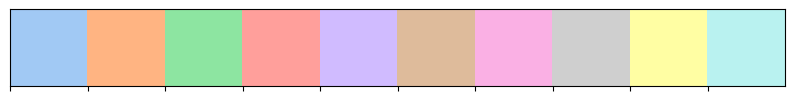

In [78]:
palette = sns.color_palette("pastel")
sns.palplot(palette)

In [138]:
participant_markers = {
    "UNF-CRIUGM 1": "o",
    "UNF-CRIUGM 2": "s",
    "UNF-CRIUGM 3": "D",
    "UNF-CRIUGM 4": "^",
    "UNF-CRIUGM 5": "2",
    "UNF-CRIUGM 6": "3"
}

In [66]:
m_3_gm_msk_data = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\chi_003_m2_gm_msk.nii.gz").get_fdata()
m_3_wm_msk_data = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\chi_003_m2_wm_msk.nii.gz").get_fdata()

m_4_gm_msk_data = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_004\qsm_processing\m2\chi_004_m2_gm_msk.nii.gz").get_fdata()
m_4_wm_msk_data = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_004\qsm_processing\m2\chi_004_m2_wm_msk.nii.gz").get_fdata()

m_5_gm_msk_data = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_005\qsm_processing\chi_005_gm_msk.nii.gz").get_fdata()
m_5_wm_msk_data = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_005\qsm_processing\chi_005_wm_msk.nii.gz").get_fdata()

m_6_gm_msk_data = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_006\qsm_processing\chi_006_m3_gm_msk.nii.gz").get_fdata()
m_6_wm_msk_data = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_006\qsm_processing\chi_006_m3_wm_msk.nii.gz").get_fdata()

m_7_gm_msk_data = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_007\qsm_processing\chi_007_m1_gm_msk.nii.gz").get_fdata()
m_7_wm_msk_data = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_007\qsm_processing\chi_007_m1_wm_msk.nii.gz").get_fdata()

m_8_gm_msk_data = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_008\qsm_processing\chi_008_gm_msk.nii.gz").get_fdata()
m_8_wm_msk_data = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_008\qsm_processing\chi_008_wm_msk.nii.gz").get_fdata()

In [ ]:
# Load the respective gray and white matter masks
z1_gm_msk_data = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc1\m2\custom_hc1_m2_gm_msk.nii.gz").get_fdata()
z1_wm_msk_data = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc1\m2\custom_hc1_m2_wm_msk.nii.gz").get_fdata()

z2_gm_msk_data = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc2\m1\custom_hc2_m1_gm_msk.nii.gz").get_fdata()
z2_wm_msk_data = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc2\m1\custom_hc2_m1_wm_msk.nii.gz").get_fdata()


In [ ]:
# Load the vertebrae labeled SC masks
z1_vertfile_data = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc1\m2\hc1_m2_sc_msk_labeled_fixed.nii.gz").get_fdata()
z2_vertfile_data = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc2\m1\custom1_sc_vert_msk_fixed.nii.gz").get_fdata()


In [67]:
m_3_vertfile_data = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\chi_003_m2_vertfiles\chi_003_m2_warped_vertfile.nii.gz").get_fdata()
m_4_vertfile_data = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_004\qsm_processing\m2\chi_004_m2_warped_vertfile.nii.gz").get_fdata()
m_5_vertfile_data = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_005\qsm_processing\chi_005_warped_vertfile.nii.gz").get_fdata()
m_6_vertfile_data = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_006\qsm_processing\chi_006_m3_warped_vertfile.nii.gz").get_fdata()
m_7_vertfile_data = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_007\qsm_processing\chi_007_m1_warped_vertfile.nii.gz").get_fdata()
m_8_vertfile_data = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_008\qsm_processing\chi_008_warped_vertfile.nii.gz").get_fdata()

# <span style="color:#3FC2E0"> BGFR Dot plot </span> </br>

## <span style="color:#64DAE8"> BGFR across participants </span> </br>
best performing BGFR per-vertebrae for WM and GM local field values across subjects

In [ ]:
zurich_1_best_lf_img = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc1\m2\local_field\opt_pdf\Sepia_localfield.nii.gz")
zurich_2_best_lf_img = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc2\m1\local_field\final_pdf_opt\Sepia_localfield.nii.gz")


In [69]:
montreal_3_best_lf_img =nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\auto_bgfr_comp\comp_bgfr\opt_pdf\Sepia_localfield.nii.gz")
montreal_4_best_lf_img = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_004\qsm_processing\m2\auto_bgfr_comp\comp_bgfr\opt_pdf\Sepia_localfield.nii.gz")
montreal_5_best_lf_img = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_005\qsm_processing\auto_bgfr_comp\comp_bgfr\opt_pdf\Sepia_localfield.nii.gz")
montreal_6_best_lf_img = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_006\qsm_processing\auto_bgfr_comp\comp_bgfr\opt_pdf\Sepia_localfield.nii.gz")
montreal_7_best_lf_img = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_007\qsm_processing\auto_bgfr_comp\comp_bgfr\opt_pdf\Sepia_localfield.nii.gz")
montreal_8_best_lf_img = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_008\qsm_processing\auto_bgfr_comp\comp_bgfr\opt_pdf\Sepia_localfield.nii.gz")

In [ ]:
z1_lf_data = zurich_1_best_lf_img.get_fdata()
z2_lf_data = zurich_2_best_lf_img.get_fdata()   

In [70]:
# Get the numpy data
m_3_lf_data = montreal_3_best_lf_img.get_fdata()
m_4_lf_data = montreal_4_best_lf_img.get_fdata()
m_5_lf_data = montreal_5_best_lf_img.get_fdata()
m_6_lf_data = montreal_6_best_lf_img.get_fdata()
m_7_lf_data = montreal_7_best_lf_img.get_fdata()
m_8_lf_data = montreal_8_best_lf_img.get_fdata()

In [126]:
lf_data = []

# Chi_003
print("Processing Chi_003 - gm")
lf_data += extract_values_per_vertebrae(m_3_lf_data, m_3_gm_msk_data, m_3_vertfile_data, "UNF-CRIUGM 1", "GM", "mean")
print("Processing Chi_003 - wm")
lf_data += extract_values_per_vertebrae(m_3_lf_data, m_3_wm_msk_data, m_3_vertfile_data, "UNF-CRIUGM 1", "WM", "mean")

# Chi_004
print("Processing Chi_004 - gm")
lf_data += extract_values_per_vertebrae(m_4_lf_data, m_4_gm_msk_data, m_4_vertfile_data, "UNF-CRIUGM 2", "GM", "mean")
print("Processing Zurich - wm")
lf_data += extract_values_per_vertebrae(m_4_lf_data, m_4_wm_msk_data, m_4_vertfile_data, "UNF-CRIUGM 2", "WM", "mean")

# Chi_005
print("Processing Chi_005 - gm")
lf_data += extract_values_per_vertebrae(m_5_lf_data, m_5_gm_msk_data, m_5_vertfile_data, "UNF-CRIUGM 3", "GM", "mean")
print("Processing Chi_005 - wm")
lf_data += extract_values_per_vertebrae(m_5_lf_data, m_5_wm_msk_data, m_5_vertfile_data, "UNF-CRIUGM 3", "WM", "mean")

# Chi_006
print("Processing Chi_006 - gm")
lf_data += extract_values_per_vertebrae(m_6_lf_data, m_6_gm_msk_data, m_6_vertfile_data, "UNF-CRIUGM 4", "GM", "mean")
print("Processing Chi_006 - wm")
lf_data += extract_values_per_vertebrae(m_6_lf_data, m_6_wm_msk_data, m_6_vertfile_data, "UNF-CRIUGM 4", "WM", "mean")

#Chi_007
print("Processing Chi_007 - gm")
lf_data += extract_values_per_vertebrae(m_7_lf_data, m_7_gm_msk_data, m_7_vertfile_data, "UNF-CRIUGM 5", "GM", "mean")
print("Processing Chi_007 - wm")
lf_data += extract_values_per_vertebrae(m_7_lf_data, m_7_wm_msk_data, m_7_vertfile_data, "UNF-CRIUGM 5", "WM", "mean")


#Chi_008
print("Processing Chi_008 - gm")
lf_data += extract_values_per_vertebrae(m_8_lf_data, m_8_gm_msk_data, m_8_vertfile_data, "UNF-CRIUGM 6", "GM", "mean")
print("Processing Chi_008 - wm")
lf_data += extract_values_per_vertebrae(m_8_lf_data, m_8_wm_msk_data, m_8_vertfile_data, "UNF-CRIUGM 6", "WM", "mean")


best_lf_df = pd.DataFrame(lf_data)

Processing Chi_003 - gm
Calculating for vertebrae: 1.0
Mean value for vertebrae 1.0, tissue GM: 0.1777273798184415
Calculating for vertebrae: 2.0
Mean value for vertebrae 2.0, tissue GM: 0.5628324806318612
Calculating for vertebrae: 3.0
Mean value for vertebrae 3.0, tissue GM: 0.7061515952871636
Calculating for vertebrae: 4.0
Mean value for vertebrae 4.0, tissue GM: 0.5836356224026531
Calculating for vertebrae: 5.0
Mean value for vertebrae 5.0, tissue GM: 0.22680001269406136
Total records extracted for GM: 5
Processing Chi_003 - wm
Calculating for vertebrae: 1.0
Mean value for vertebrae 1.0, tissue WM: -0.03833312069832172
Calculating for vertebrae: 2.0
Mean value for vertebrae 2.0, tissue WM: -0.08961014174384811
Calculating for vertebrae: 3.0
Mean value for vertebrae 3.0, tissue WM: -0.14404679449621544
Calculating for vertebrae: 4.0
Mean value for vertebrae 4.0, tissue WM: -0.12893621394744906
Calculating for vertebrae: 5.0
Mean value for vertebrae 5.0, tissue WM: -0.061743053826874

In [127]:
# To exclude vertebrae 5 because this are not accurate measurements
best_lf_df = best_lf_df[best_lf_df['Vertebrae'].isin([1, 2, 3, 4])]


In [128]:
print(best_lf_df.shape)
print(best_lf_df.head())


(48, 5)
  Participant_ID  Vertebrae Tissue     Value  Nvoxels
0   UNF-CRIUGM 1          1     GM  0.177727      171
1   UNF-CRIUGM 1          2     GM  0.562832      151
2   UNF-CRIUGM 1          3     GM  0.706152      188
3   UNF-CRIUGM 1          4     GM  0.583636      180
5   UNF-CRIUGM 1          1     WM -0.038333      794


In [129]:
# Update the vertebrae numbers to strings for better plotting
best_lf_df['Vertebrae'] = best_lf_df['Vertebrae'].astype(str)
# Then change name instead of 1 to C2, 2 to C3, 3 to C4
best_lf_df['Vertebrae'] = best_lf_df['Vertebrae'].replace({'1': 'C1', '2': 'C2', '3': 'C3', '4': 'C4', '5': 'C5'})

In [130]:
best_lf_df_wm = best_lf_df[best_lf_df["Tissue"] == "WM"]
best_lf_df_gm = best_lf_df[best_lf_df["Tissue"] == "GM"]

In [131]:
best_lf_df_gm.head()

,Participant_ID,Vertebrae,Tissue,Value,Nvoxels
0,UNF-CRIUGM 1,C1,GM,0.177727,171
1,UNF-CRIUGM 1,C2,GM,0.562832,151
2,UNF-CRIUGM 1,C3,GM,0.706152,188
3,UNF-CRIUGM 1,C4,GM,0.583636,180
10,UNF-CRIUGM 2,C1,GM,0.517888,240


In [132]:
best_lf_df_wm.head()

,Participant_ID,Vertebrae,Tissue,Value,Nvoxels
5,UNF-CRIUGM 1,C1,WM,-0.038333,794
6,UNF-CRIUGM 1,C2,WM,-0.089610,847
7,UNF-CRIUGM 1,C3,WM,-0.144047,820
8,UNF-CRIUGM 1,C4,WM,-0.128936,927
14,UNF-CRIUGM 2,C1,WM,-0.091432,1259


In [133]:
subj_means_lf = (
    best_lf_df
    .groupby(["Participant_ID", "Vertebrae", "Tissue"])["Value"]
    .mean()
    .reset_index()
)
print(subj_means_lf)

   Participant_ID Vertebrae Tissue     Value
0    UNF-CRIUGM 1        C1     GM  0.177727
1    UNF-CRIUGM 1        C1     WM -0.038333
2    UNF-CRIUGM 1        C2     GM  0.562832
3    UNF-CRIUGM 1        C2     WM -0.089610
4    UNF-CRIUGM 1        C3     GM  0.706152
5    UNF-CRIUGM 1        C3     WM -0.144047
6    UNF-CRIUGM 1        C4     GM  0.583636
7    UNF-CRIUGM 1        C4     WM -0.128936
8    UNF-CRIUGM 2        C1     GM  0.517888
9    UNF-CRIUGM 2        C1     WM -0.091432
10   UNF-CRIUGM 2        C2     GM  0.450910
11   UNF-CRIUGM 2        C2     WM -0.097484
12   UNF-CRIUGM 2        C3     GM  0.569221
13   UNF-CRIUGM 2        C3     WM -0.109290
14   UNF-CRIUGM 2        C4     GM  0.436603
15   UNF-CRIUGM 2        C4     WM -0.091251
16   UNF-CRIUGM 3        C1     GM  0.618557
17   UNF-CRIUGM 3        C1     WM -0.121388
18   UNF-CRIUGM 3        C2     GM  1.187168
19   UNF-CRIUGM 3        C2     WM -0.194319
20   UNF-CRIUGM 3        C3     GM  1.371432
21   UNF-C

In [134]:
group_means_lf = (
    subj_means_lf
    .groupby(["Vertebrae", "Tissue"])["Value"]
    .mean()
    .reset_index()
)
print(group_means_lf)

  Vertebrae Tissue     Value
0        C1     GM  0.348094
1        C1     WM -0.066713
2        C2     GM  0.592413
3        C2     WM -0.106428
4        C3     GM  0.722245
5        C3     WM -0.120274
6        C4     GM  0.441222
7        C4     WM -0.099315


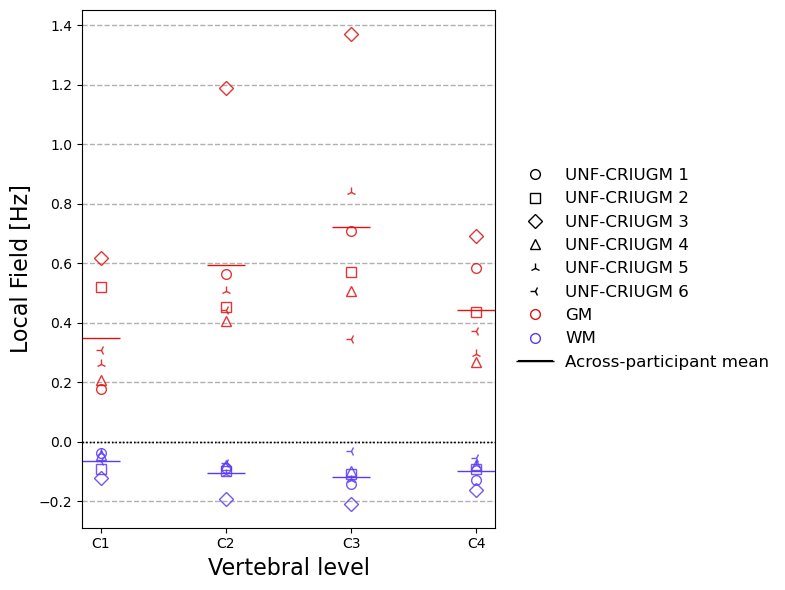

In [140]:
# LOCAL FIELD PLOT
plt.figure(figsize=(8, 6
                    ))

vertebrae = sorted(best_lf_df["Vertebrae"].unique())
x = np.arange(len(vertebrae))

tissues = ["GM", "WM"]
offsets = {"GM": 0, "WM": 0}

# --- participant-level dots ---
for tissue in tissues:
    for pid in participant_markers.keys():
        df_tmp = subj_means_lf[
            (subj_means_lf["Participant_ID"] == pid) &
            (subj_means_lf["Tissue"] == tissue)
        ].set_index("Vertebrae").reindex(vertebrae)

        plt.plot(
            x,
            df_tmp["Value"],
            linestyle="None",
            marker=participant_markers[pid],
            markerfacecolor='none',
            markersize=7,
            color=tissue_colors[tissue],
            alpha=0.85
        )

# --- group mean dashes ---
for tissue in tissues:
    df_tmp = group_means_lf[group_means_lf["Tissue"] == tissue].set_index("Vertebrae")

    plt.plot(
        x,
        df_tmp.loc[vertebrae]["Value"],
        linestyle="None",
        marker="_",
        markersize=28,
        color=tissue_colors[tissue],
        linewidth=4,
        label=f"{tissue} mean"
    )


from matplotlib.lines import Line2D

participant_legend = [
    Line2D([0], [0], marker=participant_markers[pid], color="k",
           linestyle="None", markersize=7, label=pid)
    for pid in participant_markers
]

tissue_legend = [
    Line2D([0], [0], marker="o", color=tissue_colors["GM"],
           linestyle="None", markersize=7, label="GM"),
    Line2D([0], [0], marker="o", color=tissue_colors["WM"],
           linestyle="None", markersize=7, label="WM"),
    Line2D([0], [0], marker="_", color="k",
           markersize=28, label="Across-participant mean"),
]

for h in participant_legend + tissue_legend:
    if hasattr(h, "set_markerfacecolor"):
        h.set_markerfacecolor('none')

plt.legend(
    handles=participant_legend + tissue_legend,
    fontsize=12,
    frameon=False,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5)
)

plt.xticks(x, vertebrae)
plt.axhline(0, linestyle=":", color="k", linewidth=1)
plt.ylabel("Local Field (Hz)", fontsize=16)
plt.xlabel("Vertebral level", fontsize=16)

plt.grid(
    axis="y",
    linestyle="--",
    linewidth=1,
    alpha=1
)


plt.xticks(x, vertebrae)
plt.axhline(0, linestyle=":", color="k", linewidth=1)
plt.ylabel("Local Field [Hz]")
plt.xlabel("Vertebral level")

plt.tight_layout()
plt.show()



## <span style="color:#C46FD9"> DI across participants </span> </br>
best performing DI boxplot of per-vertebrae WM and GM susceptibility map values across subjects (vertebrae values on x-axis, for each vertebrae two boxes, one for WM and one for GM)

In [ ]:
zurich_1_best_xmap_img = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc1\m2\chi_map\pdf_to_closedForm\opt_to_opt\Sepia_Chimap.nii.gz")
zurich_2_best_xmap_img = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc2\m1\chi_map\opt_pdf_to_all_DI\opt_closedForm\Sepia_Chimap.nii.gz")

In [ ]:
z1_xmap_data = zurich_1_best_xmap_img.get_fdata()
z2_xmap_data = zurich_2_best_xmap_img.get_fdata()   

In [ ]:
montreal_3_def_closedForm = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\auto_di_comp\comp_di\def_closedForm\Sepia_Chimap.nii.gz")
montreal_4_def_closedForm = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_004\qsm_processing\m2\auto_di_comp\comp_di\def_closedForm\Sepia_Chimap.nii.gz")
montreal_5_def_closedForm = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_005\qsm_processing\auto_di_comp\comp_di\def_closedForm\Sepia_Chimap.nii.gz")
montreal_6_def_closedForm = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_006\qsm_processing\auto_di_comp\comp_di\def_closedForm\Sepia_Chimap.nii.gz")
montreal_7_def_closedForm = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_007\qsm_processing\auto_di_comp\comp_di\def_closedForm\Sepia_Chimap.nii.gz")
montreal_8_def_closedForm = nib.load("E:\msc_data\sc_qsm\neuropoly_data\chi_008\qsm_processing\auto_di_comp\comp_di\def_closedForm\Sepia_Chimap.nii.gz")

In [ ]:
montreal_3_auto_closedForm = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\auto_di_comp\comp_di\auto_closedForm\Sepia_Chimap.nii.gz")
montreal_4_auto_closedForm = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_004\qsm_processing\m2\auto_di_comp\comp_di\auto_closedForm\Sepia_Chimap.nii.gz")
montreal_5_auto_closedForm = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_005\qsm_processing\auto_di_comp\comp_di\auto_closedForm\Sepia_Chimap.nii.gz")
montreal_6_auto_closedForm = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_006\qsm_processing\auto_di_comp\comp_di\auto_closedForm\Sepia_Chimap.nii.gz")
montreal_7_auto_closedForm = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_007\qsm_processing\auto_di_comp\comp_di\auto_closedForm\Sepia_Chimap.nii.gz")
montreal_8_auto_closedForm = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_008\qsm_processing\auto_di_comp\comp_di\auto_closedForm\Sepia_Chimap.nii.gz")

In [98]:
montreal_3_opt_closedForm = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\auto_di_comp\comp_di\opt_closedForm\Sepia_Chimap.nii.gz")
montreal_4_opt_closedForm = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_004\qsm_processing\m2\auto_di_comp\comp_di\opt_closedForm\Sepia_Chimap.nii.gz")
montreal_5_opt_closedForm = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_005\qsm_processing\auto_di_comp\comp_di\opt_closedForm\Sepia_Chimap.nii.gz")
montreal_6_opt_closedForm = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_006\qsm_processing\auto_di_comp\comp_di\opt_closedForm\Sepia_Chimap.nii.gz")
montreal_7_opt_closedForm = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_007\qsm_processing\auto_di_comp\comp_di\opt_closedForm\Sepia_Chimap.nii.gz")
montreal_8_opt_closedForm = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_008\qsm_processing\auto_di_comp\comp_di\opt_closedForm\Sepia_Chimap.nii.gz")

In [99]:
m_3_xmap_data = montreal_3_opt_closedForm.get_fdata()
m_4_xmap_data = montreal_4_opt_closedForm.get_fdata()
m_5_xmap_data = montreal_5_opt_closedForm.get_fdata()
m_6_xmap_data = montreal_6_opt_closedForm.get_fdata()
m_7_xmap_data = montreal_7_opt_closedForm.get_fdata()
m_8_xmap_data = montreal_8_opt_closedForm.get_fdata()

In [141]:
xmap_data = []

# Chi_003
print("Processing Chi_003 - gm")
xmap_data += extract_values_per_vertebrae(m_3_xmap_data, m_3_gm_msk_data, m_3_vertfile_data, "UNF-CRIUGM 1", "GM", "mean")
print("Processing Chi_003 - wm")
xmap_data += extract_values_per_vertebrae(m_3_xmap_data, m_3_wm_msk_data, m_3_vertfile_data, "UNF-CRIUGM 1", "WM", "mean")

# Chi_004
print("Processing Chi_004 - gm")
xmap_data += extract_values_per_vertebrae(m_4_xmap_data, m_4_gm_msk_data, m_4_vertfile_data, "UNF-CRIUGM 2", "GM", "mean")
print("Processing Chi_004 - wm")
xmap_data += extract_values_per_vertebrae(m_4_xmap_data, m_4_wm_msk_data, m_4_vertfile_data, "UNF-CRIUGM 2", "WM", "mean")

# Chi_005
print("Processing Chi_005 - gm")
xmap_data += extract_values_per_vertebrae(m_5_xmap_data, m_5_gm_msk_data, m_5_vertfile_data, "UNF-CRIUGM 3", "GM", "mean")
print("Processing Chi_005 - wm")
xmap_data += extract_values_per_vertebrae(m_5_xmap_data, m_5_wm_msk_data, m_5_vertfile_data, "UNF-CRIUGM 3", "WM", "mean")

# Chi_006
print("Processing Chi_006 - gm")
xmap_data += extract_values_per_vertebrae(m_6_xmap_data, m_6_gm_msk_data, m_6_vertfile_data, "UNF-CRIUGM 4", "GM", "mean")
print("Processing Chi_006 - wm")
xmap_data += extract_values_per_vertebrae(m_6_xmap_data, m_6_wm_msk_data, m_6_vertfile_data, "UNF-CRIUGM 4", "WM", "mean")

# Chi_007
print("Processing Chi_007 - gm")
xmap_data += extract_values_per_vertebrae(m_7_xmap_data, m_7_gm_msk_data, m_7_vertfile_data, "UNF-CRIUGM 5", "GM", "mean")
print("Processing Chi_007 - wm")
xmap_data += extract_values_per_vertebrae(m_7_xmap_data, m_7_wm_msk_data, m_7_vertfile_data, "UNF-CRIUGM 5", "WM", "mean")

# Chi_008
print("Processing Chi_008 - gm")
xmap_data += extract_values_per_vertebrae(m_8_xmap_data, m_8_gm_msk_data, m_8_vertfile_data, "UNF-CRIUGM 6", "GM", "mean")
print("Processing Chi_008 - wm")
xmap_data += extract_values_per_vertebrae(m_8_xmap_data, m_8_wm_msk_data, m_8_vertfile_data, "UNF-CRIUGM 6", "WM", "mean")



best_xmap_df = pd.DataFrame(xmap_data)

Processing Chi_003 - gm
Calculating for vertebrae: 1.0
Mean value for vertebrae 1.0, tissue GM: 0.004350422948388838
Calculating for vertebrae: 2.0
Mean value for vertebrae 2.0, tissue GM: 0.014109528449717492
Calculating for vertebrae: 3.0
Mean value for vertebrae 3.0, tissue GM: 0.01716815828416308
Calculating for vertebrae: 4.0
Mean value for vertebrae 4.0, tissue GM: 0.013610023138850617
Calculating for vertebrae: 5.0
Mean value for vertebrae 5.0, tissue GM: 0.005268458925702608
Total records extracted for GM: 5
Processing Chi_003 - wm
Calculating for vertebrae: 1.0
Mean value for vertebrae 1.0, tissue WM: -0.000880533774110236
Calculating for vertebrae: 2.0
Mean value for vertebrae 2.0, tissue WM: -0.002129817834380165
Calculating for vertebrae: 3.0
Mean value for vertebrae 3.0, tissue WM: -0.003298427567176809
Calculating for vertebrae: 4.0
Mean value for vertebrae 4.0, tissue WM: -0.003126087898942241
Calculating for vertebrae: 5.0
Mean value for vertebrae 5.0, tissue WM: -0.001

In [142]:
# Because only one subject has vertebrae 4 and 5 labeled, we will exclude these levels from the plot
best_xmap_df = best_xmap_df[best_xmap_df['Vertebrae'].isin([1, 2, 3, 4])]

In [143]:
# Update the vertebrae numbers to strings for better plotting
best_xmap_df['Vertebrae'] = best_xmap_df['Vertebrae'].astype(str)
# Then change name instead of 1 to C2, 2 to C3, 3 to C4
best_xmap_df['Vertebrae'] = best_xmap_df['Vertebrae'].replace({'1': 'C1', '2': 'C2', '3': 'C3', '4': 'C4', '5': 'C5'})

In [144]:
best_xmap_df_wm = best_xmap_df[best_xmap_df["Tissue"] == "WM"]
best_xmap_df_gm = best_xmap_df[best_xmap_df["Tissue"] == "GM"]

In [145]:
best_xmap_df_wm.head()

,Participant_ID,Vertebrae,Tissue,Value,Nvoxels
5,UNF-CRIUGM 1,C1,WM,-0.000881,794
6,UNF-CRIUGM 1,C2,WM,-0.002130,847
7,UNF-CRIUGM 1,C3,WM,-0.003298,820
8,UNF-CRIUGM 1,C4,WM,-0.003126,927
14,UNF-CRIUGM 2,C1,WM,-0.002217,1259


In [146]:
best_xmap_df_gm.head()

,Participant_ID,Vertebrae,Tissue,Value,Nvoxels
0,UNF-CRIUGM 1,C1,GM,0.004350,171
1,UNF-CRIUGM 1,C2,GM,0.014110,151
2,UNF-CRIUGM 1,C3,GM,0.017168,188
3,UNF-CRIUGM 1,C4,GM,0.013610,180
10,UNF-CRIUGM 2,C1,GM,0.013221,240


In [147]:
subj_means_xmap = (
    best_xmap_df
    .groupby(["Participant_ID", "Vertebrae", "Tissue"])["Value"]
    .mean()
    .reset_index()
)
print(subj_means_xmap)

   Participant_ID Vertebrae Tissue     Value
0    UNF-CRIUGM 1        C1     GM  0.004350
1    UNF-CRIUGM 1        C1     WM -0.000881
2    UNF-CRIUGM 1        C2     GM  0.014110
3    UNF-CRIUGM 1        C2     WM -0.002130
4    UNF-CRIUGM 1        C3     GM  0.017168
5    UNF-CRIUGM 1        C3     WM -0.003298
6    UNF-CRIUGM 1        C4     GM  0.013610
7    UNF-CRIUGM 1        C4     WM -0.003126
8    UNF-CRIUGM 2        C1     GM  0.013221
9    UNF-CRIUGM 2        C1     WM -0.002217
10   UNF-CRIUGM 2        C2     GM  0.011504
11   UNF-CRIUGM 2        C2     WM -0.002613
12   UNF-CRIUGM 2        C3     GM  0.013971
13   UNF-CRIUGM 2        C3     WM -0.002702
14   UNF-CRIUGM 2        C4     GM  0.010417
15   UNF-CRIUGM 2        C4     WM -0.002262
16   UNF-CRIUGM 3        C1     GM  0.015595
17   UNF-CRIUGM 3        C1     WM -0.003562
18   UNF-CRIUGM 3        C2     GM  0.028262
19   UNF-CRIUGM 3        C2     WM -0.004705
20   UNF-CRIUGM 3        C3     GM  0.033003
21   UNF-C

In [148]:
group_means_xmap = (
    subj_means_xmap
    .groupby(["Vertebrae", "Tissue"])["Value"]
    .mean()
    .reset_index()
)
print(group_means_xmap)

  Vertebrae Tissue     Value
0        C1     GM  0.008784
1        C1     WM -0.001747
2        C2     GM  0.014502
3        C2     WM -0.002634
4        C3     GM  0.017361
5        C3     WM -0.002799
6        C4     GM  0.010480
7        C4     WM -0.002380


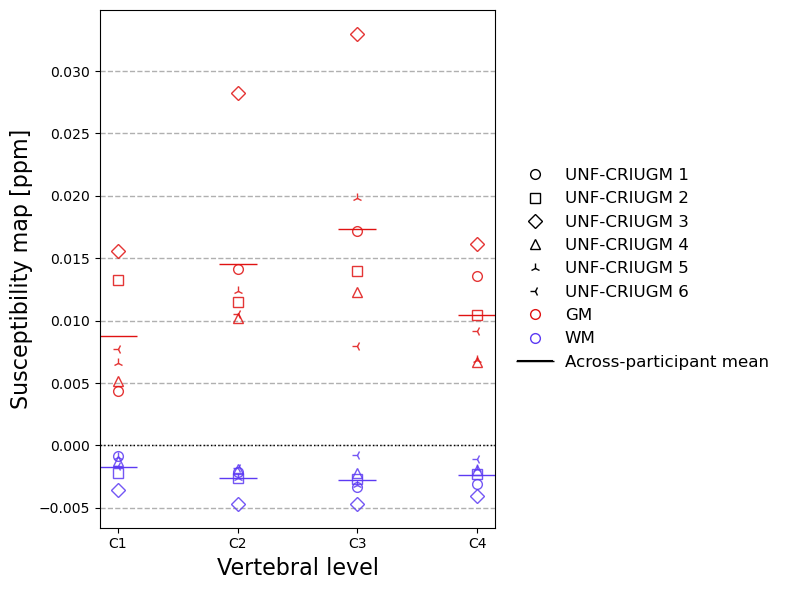

In [153]:
# SUSCEPTIBILITY MAP PLOT
plt.figure(figsize=(8, 6
                    ))

vertebrae = sorted(best_xmap_df["Vertebrae"].unique())
x = np.arange(len(vertebrae))

tissues = ["GM", "WM"]
offsets = {"GM": 0, "WM": 0}

# --- participant-level dots ---
for tissue in tissues:
    for pid in participant_markers.keys():
        df_tmp = subj_means_xmap[
            (subj_means_xmap["Participant_ID"] == pid) &
            (subj_means_xmap["Tissue"] == tissue)
        ].set_index("Vertebrae").reindex(vertebrae)

        plt.plot(
            x,
            df_tmp["Value"],
            linestyle="None",
            marker=participant_markers[pid],
            markersize=7,
            color=tissue_colors[tissue],
            markerfacecolor='none',
            alpha=0.85
        )

# --- group mean dashes ---
for tissue in tissues:
    df_tmp = group_means_xmap[group_means_xmap["Tissue"] == tissue].set_index("Vertebrae")

    plt.plot(
        x,
        df_tmp.loc[vertebrae]["Value"],
        linestyle="None",
        marker="_",
        markersize=28,
        color=tissue_colors[tissue],
        linewidth=4,
        label=f"{tissue} mean"
    )


from matplotlib.lines import Line2D

participant_legend = [
    Line2D([0], [0], marker=participant_markers[pid], color="k",
           linestyle="None", markersize=7, label=pid)
    for pid in participant_markers
]

tissue_legend = [
    Line2D([0], [0], marker="o", color=tissue_colors["GM"],
           linestyle="None", markersize=7, label="GM"),
    Line2D([0], [0], marker="o", color=tissue_colors["WM"],
           linestyle="None", markersize=7, label="WM"),
    Line2D([0], [0], marker="_", color="k",
           markersize=28, label="Across-participant mean"),
]

for h in participant_legend + tissue_legend:
    if hasattr(h, "set_markerfacecolor"):
        h.set_markerfacecolor('none')

plt.legend(
    handles=participant_legend + tissue_legend,
    fontsize=12,
    frameon=False,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5)
)


plt.grid(
    axis="y",
    linestyle="--",
    linewidth=1,
    alpha=1
)

plt.xticks(x, vertebrae)
plt.axhline(0, linestyle=":", color="k", linewidth=1)
plt.ylabel("Susceptibility map [ppm]", fontsize=16)
plt.xlabel("Vertebral level",fontsize=16)

plt.tight_layout()
plt.show()


In [150]:
# Now, for the final row of Table 1 of the paper, annotate the SC WM GM before vs after optimization:
gm_before_opt_means = np.array([0.009, 0.0094, 0.0199, 0.0063, 0.0096, 0.0056])
wm_before_opt_means = np.array([-0.0017, -0.0016, -0.0037, -0.0013, -0.0017, -0.0010])
gm_after_opt_means  = np.array([0.011, 0.012, 0.0232, 0.0086, 0.011, 0.0068])
wm_after_opt_means  = np.array([-0.0021, -0.0021, -0.0044, -0.0016, -0.0020, -0.0012])

# Inter-subject mean and SD (ddof=1 for sample SD)
dataset_gm_mean_before = np.mean(gm_before_opt_means)
dataset_gm_sd_before   = np.std(gm_before_opt_means, ddof=1)

dataset_wm_mean_before = np.mean(wm_before_opt_means)
dataset_wm_sd_before   = np.std(wm_before_opt_means, ddof=1)

dataset_gm_mean_after  = np.mean(gm_after_opt_means)
dataset_gm_sd_after    = np.std(gm_after_opt_means, ddof=1)

dataset_wm_mean_after  = np.mean(wm_after_opt_means)
dataset_wm_sd_after    = np.std(wm_after_opt_means, ddof=1)

# Print nicely formatted (5 decimal places)
print("=== BEFORE OPTIMIZATION ===")
print(f"GM: {dataset_gm_mean_before:.5f} ± {dataset_gm_sd_before:.5f}")
print(f"WM: {dataset_wm_mean_before:.5f} ± {dataset_wm_sd_before:.5f}")

print("\n=== AFTER OPTIMIZATION ===")
print(f"GM: {dataset_gm_mean_after:.5f} ± {dataset_gm_sd_after:.5f}")
print(f"WM: {dataset_wm_mean_after:.5f} ± {dataset_wm_sd_after:.5f}")



=== BEFORE OPTIMIZATION ===
GM: 0.00997 ± 0.00515
WM: -0.00183 ± 0.00095

=== AFTER OPTIMIZATION ===
GM: 0.01210 ± 0.00576
WM: -0.00223 ± 0.00112


## <span style="color:#1FCBED"> Comparing k-space data? </span> </br>
This is an idea I have to show something regarding DI algorithms in-vivo for SC and comparing to brain in-vivo QSM :) </br>
Theory: </br>
Remember that the forward model for QSM is: $\Delta B(k) = D(k) \cdot \chi (k)$ </br>
Therefore let's analyze the local fields!

In [ ]:
# We already load in our best local field above so let's just reuse that data
# The one we use is: m_lf_data and montreal_best_lf_img for image affine and header
# First calculate snr with brain data
brain_mag_img =r"E:\msc_data\sc_qsm\neuropoly_data\brain_testing_data\Magnitude_data.nii.gz"
brain_noise_msk_data = r"E:\msc_data\sc_qsm\neuropoly_data\brain_testing_data\noise_msk.nii.gz"
brain_signal_msk_data = r"E:\msc_data\sc_qsm\neuropoly_data\brain_testing_data\fm_tests\SEPIAs_ROMEO\Sepia_mask_brain.nii.gz"

In [329]:
snr, sigma = snr_calc(brain_mag_img, brain_signal_msk_data, brain_noise_msk_data)
# For this data, echo times are: 3, 7, 11, 15, 19, 23 ms
print(f"Brain SNR: {snr}, Sigma: {sigma}")

Brain SNR: [76.32438082 70.50967702 65.33677922 60.70862643 56.41281923 52.46814731], Sigma: 5.743902151228784


In [399]:
brain_mag_img = nib.load(brain_mag_img)

In [ ]:
# Let's see the kspace data and the dipole kernel for the brain data set
# Load the local field data
brain_local_field_data = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\brain_testing_data\local_field\def_pdf\Sepia_localfield.nii.gz").get_fdata()
# Create dipole kernel continuous
brain_DK = dipole_kernel(brain_local_field_data.shape, voxel_size=(0.6944, 0.6944, 0.7), b0_dir=(0, 0, 1), mode="continuous")
# Now calculate the k-space of the local field
brain_lf_kspace = np.fft.fftshift(np.fft.fftn(brain_local_field_data))

brain_lf_k_mag = np.log10(np.abs(brain_lf_kspace) + 1e-6)

In [ ]:
voxel_size = montreal_best_lf_img.header.get_zooms()[:3]

print("SC shape:", m_lf_data.shape)
print("Voxel size:", voxel_size)
print("FOV (mm):", np.array(m_lf_data.shape) * np.array(voxel_size))

SC shape: (384, 384, 16)
Voxel size: (np.float32(0.442708), np.float32(0.442708), np.float32(5.0))
FOV (mm): [169.99986649 169.99986649  80.        ]


In [407]:
# Now something similar but with the SC data
sc_DK = dipole_kernel(m_lf_data.shape, voxel_size=voxel_size, b0_dir=(0, 0, 1), mode="continuous")
# Now calculate the k-space of the local field
sc_lf_kspace = np.fft.fftshift(np.fft.fftn(m_lf_data))
sc_lf_k_mag = np.log10(np.abs(sc_lf_kspace) + 1e-6)


In [394]:
# Create image for local field in k-space 
kspace_img = nib.Nifti1Image(sc_lf_kspace, affine=montreal_best_lf_img.affine)
nib.save(kspace_img, r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\discussion_tests\best_LF_kspace.nii.gz")

In [396]:
# Save dipole kernel null cone lines but as binary mask
null_cone_mask = np.isclose(sc_DK, 0, atol=1e-2).astype(np.float32)
null_cone_img = nib.Nifti1Image(null_cone_mask, affine=montreal_best_lf_img.affine)
nib.save(null_cone_img, r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\discussion_tests\dipole_kernel_null_cone_mask.nii.gz")

In [401]:
# Save brain k-space image
brain_kspace_img = nib.Nifti1Image(brain_lf_kspace, affine=brain_mag_img.affine)
nib.save(brain_kspace_img, r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\discussion_tests\brain_LF_kspace.nii.gz")
# Save brain dipole kernel null cone mask
brain_null_cone_mask = np.isclose(brain_DK, 0, atol=1e-2).astype(np.float32)
brain_null_cone_img = nib.Nifti1Image(brain_null_cone_mask, affine=brain_mag_img.affine)
nib.save(brain_null_cone_img, r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\discussion_tests\brain_dipole_kernel_null_cone_mask.nii.gz")

In [ ]:
epsilon = 1e-3

msk_magic = np.abs(sc_DK) < epsilon
print("Number of voxels in magic angle mask:", np.sum(msk_magic))

Number of voxels in magic angle mask: 241


In [403]:
# Now for brain
msk_magic_brain = np.abs(brain_DK) < epsilon
print("Number of voxels in brain magic angle mask:", np.sum(msk_magic_brain))

Number of voxels in brain magic angle mask: 32333


In [404]:
# Now calculate the percentage of k-space affected by the magic angle for both brain and SC
perc_magic_sc = (np.sum(msk_magic) / sc_DK.size) * 100
perc_magic_brain = (np.sum(msk_magic_brain) / brain_DK.size) * 100
print(f"Percentage of k-space affected by magic angle (SC): {perc_magic_sc:.4f}%")
print(f"Percentage of k-space affected by magic angle (Brain): {perc_magic_brain:.4f}%")

Percentage of k-space affected by magic angle (SC): 0.0102%
Percentage of k-space affected by magic angle (Brain): 0.2436%


In [405]:
# Now let's do something similar with the phantom data with dims: 301, 351 128
phantom_lf_img = nib.load(r"E:\msc_data\sc_qsm\final_gauss_sims\November_2025\mrsim_outputs\custom_params_snr_74\bgfr_opt\iter_PDF\tol_and_padSize\RMSE_test1\pdf_run76\Sepia_localfield.nii.gz")
phantom_lf_data = phantom_lf_img.get_fdata()
phantom_DK = dipole_kernel(phantom_lf_data.shape, voxel_size=(0.9766, 0.9766, 2.344), b0_dir=(0, 0, 1), mode="continuous")
phantom_lf_kspace = np.fft.fftshift(np.fft.fftn(phantom_lf_data))
phantom_lf_k_mag = np.log10(np.abs(phantom_lf_kspace) + 1e-6)
# Create the images
phantom_kspace_img = nib.Nifti1Image(phantom_lf_kspace, affine=phantom_lf_img.affine)
nib.save(phantom_kspace_img, r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\discussion_tests/phantom_LF_kspace.nii.gz")
# Save phantom dipole kernel null cone mask
phantom_null_cone_mask = np.isclose(phantom_DK, 0, atol=1e-2).astype(np.float32)
phantom_null_cone_img = nib.Nifti1Image(phantom_null_cone_mask, affine=phantom_lf_img.affine)
nib.save(phantom_null_cone_img, r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\discussion_tests/phantom_dipole_kernel_null_cone_mask.nii.gz")
# Calculate magic angle mask for phantom
msk_magic_phantom = np.abs(phantom_DK) < epsilon
print("Number of voxels in phantom magic angle mask:", np.sum(msk_magic_phantom))
# Now calculate the percentage of k-space affected by the magic angle for phantom
perc_magic_phantom = (np.sum(msk_magic_phantom) / phantom_DK.size) * 100
print(f"Percentage of k-space affected by magic angle (Phantom): {perc_magic_phantom:.4f}%")

Number of voxels in phantom magic angle mask: 10981
Percentage of k-space affected by magic angle (Phantom): 0.0812%


## <span style="color:#80F296"> Useful informations for Discussions section </span> </br>
Using in-vivo data

In [319]:
# Regarding dipole inversion, maybe we can do some stuff to further analyze the results from algos
# First idea, subtract from tkd x-map with iLSQR x-map
tkd_xmap_best = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\chi_map\tkd_dev\test3_noisy_opt_t1\Sepia_Chimap.nii.gz")
iLSQR_xmap_best = nib.load(r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\chi_map\iLSQR_dev\test3_noisyOpt_t1\Sepia_Chimap.nii.gz")

In [320]:
tkd_xmap_best_data = tkd_xmap_best.get_fdata()
iLSQR_xmap_best_data = iLSQR_xmap_best.get_fdata()

diff_tkd_iLSQR = tkd_xmap_best_data - iLSQR_xmap_best_data

# Now we can visualize this difference map
diff_img = nib.Nifti1Image(diff_tkd_iLSQR, affine=tkd_xmap_best.affine)
nib.save(diff_img, r"E:\msc_data\sc_qsm\neuropoly_data\chi_003\qsm_processing\2nd_3D_meGRE\discussion_tests\diff_tkd_iLSQR.nii.gz")